<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** José de Jesús Morales Dominguez, Dario Castro González, Juan Pablo Domínguez Rodríguez.

**Fecha:** 21 de febrero del 2024.

**Expediente** : 742298, 719910,  .
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/JMlrales/ProyectoConjunto_Morales_Castro_Dominguez.

# Tarea 4: Clase 8

## Simulación de Montecarlo
> Resolver los siguientes ejercicios empleando lo visto en clase sobre simulación de Montecarlo

### Ejercicio 1: Como ejemplo simple de una simulación de Monte Carlo, considere calcular la probabilidad de una suma particular del lanzamiento de tres dados (cada dado tiene valores del uno al seis). Además cada dado tiene las siguientes carácterísticas: el primer dado no está cargado (distribución uniforme todos son equiprobables); el segundo y tercer dado están cargados basados en una distribución binomial con parámetros (`n=5, p=0.5` y `n=5, p=0.2`). Calcule la probabilidad de que la suma resultante sea 7, 14 o 18. 

Código de solución estudiante 1 (*José de Jesús Morales Dominguez*)

In [ ]:
# Código de solución estudiante 1



Código de solución estudiante 2 (*Dario Castro González*)

In [2]:
# Código de solución estudiante 2
import numpy as np
from scipy.stats import binom

def lanzamiento_dado_cargado(n, p):
    probabilidades = binom.pmf(np.arange(1, 7), n, p)
    probabilidades /= probabilidades.sum()  # Normalizar las probabilidades
    return np.random.choice(np.arange(1, 7), p=probabilidades)

def simulacion_monte_carlo(num_simulaciones):
    resultados = []
    for _ in range(num_simulaciones):
        dado1 = np.random.randint(1, 7)
        dado2 = lanzamiento_dado_cargado(5, 0.5)
        dado3 = lanzamiento_dado_cargado(5, 0.2)
        suma = dado1 + dado2 + dado3
        resultados.append(suma)
    return resultados

def calcular_probabilidad(resultados, valores):
    conteo = {valor: 0 for valor in valores}
    for resultado in resultados:
        if resultado in conteo:
            conteo[resultado] += 1
    probabilidades = {valor: conteo[valor] / len(resultados) for valor in valores}
    return probabilidades

num_simulaciones = 100000
resultados = simulacion_monte_carlo(num_simulaciones)
valores_interes = [7, 14, 18]
probabilidades = calcular_probabilidad(resultados, valores_interes)

for valor in valores_interes:
    print(f"Probabilidad de obtener {valor}: {probabilidades[valor]:.4f}")


Probabilidad de obtener 7: 0.1608
Probabilidad de obtener 14: 0.0008
Probabilidad de obtener 18: 0.0000


Código de solución del estudiante 3 (*Juan Pablo Domínguez Rodríguez*)

In [ ]:
# Código de solución estudiante 3


### Ejercicio 2: En un casino, un jugador está jugando a lanzar un dado justo de 6 caras. Si el jugador lanza un número par, el casino paga $\$1$ al jugador, de lo contrario, el jugador paga $\$1$ al casino. El jugador decide jugar 100 veces.

1. ¿Cuál es la probabilidad de que un jugador gane dinero después de 100 lanzamientos del dado bajo las reglas del juego (el casino paga $\$1$ si el resultado es par y el jugador paga $\$1$ si es impar)?

2. ¿Cómo afectaría el cambio en las reglas del juego (por ejemplo, el casino paga $\$2$ si el resultado es par y el jugador paga $\$1$ si es impar) a la ganancia esperada para el jugador después de 100 lanzamientos?

Código de solución estudiante 1 (*José de Jesús Morales Dominguez*)

In [116]:
# Código de solución estudiante 1
import numpy as np
np.random.seed(200)
def dado():
    num=np.random.randint(1,7)
    if num%2==0:
        return True
    else:
        return False
#Probando la función
N=100
ganas=sum([dado() for i in range(N)])
perdidas=N-ganas
print(f' De 100 veces jugadas se ganaron {ganas} , y se perdieron {perdidas}')
prob=(ganas/N)*100
print(f' Las probabilidades de ganar después de 100 lanzamientos son: {prob}%')

 De 100 veces jugadas se ganaron 53 , y se perdieron 47
 Las probabilidades de ganar después de 100 lanzamientos son: 53.0%


[100  99 101 100  99  98  97  99 101 103 105 107 106 105 107 109 111 113
 115 117 116 118 117 119 118 120 119 118 117 119 121 123 125 124 123 125
 124 123 122 124 123 122 124 126 125 124 123 122 124 126 125 124 123 122
 121 120 122 121 120 122 121 120 122 124 123 125 127 129 131 130 129 131
 133 135 134 133 135 134 136 138 137 139 138 140 142 144 146 148 147 149
 148 150 149 148 150 152 151 153 155 157]


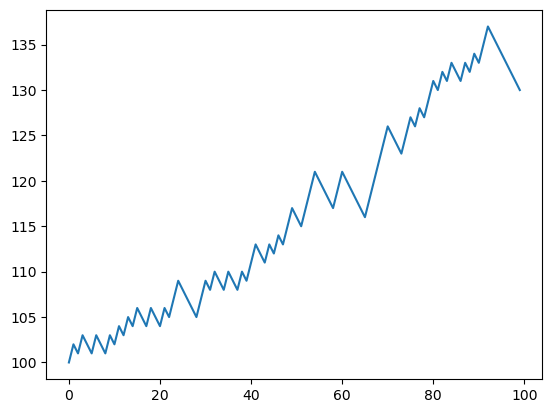

In [135]:
import matplotlib.pyplot as plt
def apostador(cap_inicial,ganar,apuestas):
    capital=[cap_inicial]+[ganar if dado() else -1 for i in range(apuestas-1)]
    return np.cumsum(capital)
np.random.seed(200)
print(apostador(100,2,100))
plt.plot(apostador(100,2,100))

Código de solución estudiante 2 (*Dario Castro González*)

In [13]:
# Código de solución estudiante 2
# Crear una función para que devuelva simplemente ganar(true) o perder(false)
def dado():
    x = np.random.randint(1,7)
    if x == 1 or x == 3 or x==5:
        return False
    else:
        return True
# Probar la función creada para ver que funcione
N = 100


contador_ganar = sum([dado() for i in range(N)])
contador_perder = N - contador_ganar
print("Ganamos", contador_ganar, " veces y perdimos", contador_perder, " veces.")
print('probabilidad de ganar=', contador_ganar / N)


Ganamos 50  veces y perdimos 50  veces.
probabilidad de ganar= 0.5


In [14]:
def apostador2(cap_inicial, apuesta, n_apuestas):
    np.random.seed(516)
    capital = cap_inicial
    c_capital = [capital]
    for i in range(n_apuestas-1):
        if dado():
            capital += apuesta
            c_capital.append(capital)
        else:
            capital -= apuesta
            ccapital.append(capital)
    return ccapital

In [16]:
def apostador_nested_f(cap_inicial, apuesta, n_apuestas):
    np.random.seed(510)
    c_capital = np.cumsum([cap_inicial] + [apuesta if dado() else -apuesta for i in range(n_apuestas)])
    return c_capital    

apostador_nested_f(100, 1, 100)

array([100,  99,  98,  97,  98,  99, 100, 101, 100, 101, 102, 101, 102,
       101, 100,  99, 100, 101, 100,  99,  98,  97,  96,  95,  96,  97,
        96,  95,  94,  93,  92,  91,  92,  93,  92,  93,  94,  95,  96,
        97,  98,  99, 100,  99,  98,  99, 100, 101, 100, 101, 100,  99,
       100,  99, 100, 101, 100, 101, 102, 103, 104, 105, 106, 105, 104,
       105, 106, 105, 106, 107, 106, 105, 104, 105, 104, 105, 106, 105,
       106, 107, 108, 109, 108, 107, 108, 109, 110, 109, 110, 109, 110,
       111, 110, 111, 110, 109, 110, 109, 108, 109, 110], dtype=int32)

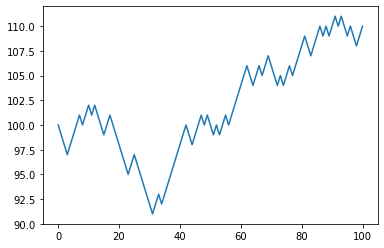

In [20]:
import matplotlib.pyplot as plt 
plt.plot(apostador_nested_f(100, 1, 100))

Código de solución del estudiante 3 (*Juan Pablo Domínguez Rodríguez*)

In [ ]:
# Código de solución estudiante 3
